$
 \newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$

# Linear Classification


<br/><br/><br/><br/>

## ITCS 6156/8156:  Machine Learning 


### Spring 2018

### Minwoo "Jake" Lee

(-3, 7)

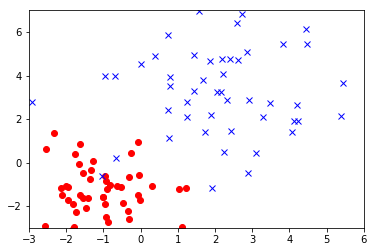

In [2]:
# Today's sample data for classification demo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Linear Model for Classification

- Linear Model
$$ \Ym = \Xm \wv $$

- Classification
$$ \Ym = h(\Xm \wv) $$

- For binary classification, what is the function $h(\cdot)$? 


# Error Function

$$
E = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1} \Big[ \sign(\wv^\top \xv_i) \ne t_i \Big] 
$$



# How do we solve the problem? 

- No analytic solution as in linear regression

- Perceptron learning model

# Perceptron Model

![](http://webpages.uncc.edu/mlee173/teach/itcs4156/images/class/03/perceptron.png)




- $h(\cdot)$ is step function 
- **Train**: update weights for each sample (SGD) 
- IDEA: to adjust weight to reflect the classification error
- Steps: examine each sample, if it is misclassified, adjust weights to fix it. 

# Perceptron Algorithm

$$ y_i = \wv^\top \xv_i < 0$$

- If $t_i > 0$, we need to fix the weights $\wv$ to make $y_i$ be positive by increasing the weights. 

- How? 
  - Hint: Remember the stochastic gradient descent! 




- Direction: increasing the weights

$$
 \wv^{(k+1)} \xv_i >  \wv^{(k)} \xv_i.
$$


- Direction: moving the decision boundary toward the data sample with an error
$$
\wv^{(k+1)} = \wv^{(k)} + \alpha \xv_i
$$

## Negative case?

- if $t_i < 0$, how do we update the weights? 

- Direction? 

- Direction: decreasingt the weights

$$
 \wv^{(k+1)} \xv_i <  \wv^{(k)} \xv_i.
$$


- Direction: moving the decision boundary toward the data sample with an error
$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \xv_i
$$

## How to combine? 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha \xv_i \quad\text{for } t_i > 0
$$

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \xv_i \quad\text{for } t_i < 0
$$

- Use $t_i$ to handle the sign
$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

# Analysis

- No guarantee on convergence
  - additional parameters for the number of iteration
- not the best solution

End of training:  999


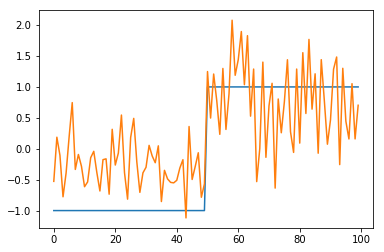

In [3]:
""" 
    Perceptron Algorithm 

"""


maxiter = 1000
alpha = 0.1

X = np.vstack((C1, C2))
N = X.shape[0]
T = np.ones(N)
T[:50] *= -1 

w = np.zeros(2) 

plt.plot(T)
for i in range(maxiter):
    
    converged = True
    for k in range(N):
        y = w @ X[k]
        if np.sign(y) != np.sign(T[k]):
            w += alpha * T[k] * X[k]
            converged = False
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
plt.plot(X@w)

(-3, 7)

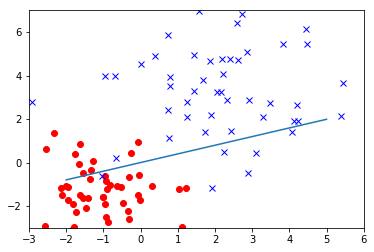

In [4]:
### show the data and the decision boundary

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


xt = np.array([-2, 5])
yt = -w[0] * xt / w[1]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Pocket Algorithm

- How can we guarantee the best solution?

- Use a **pocket** to remember the best solution. 

End of training:  9999


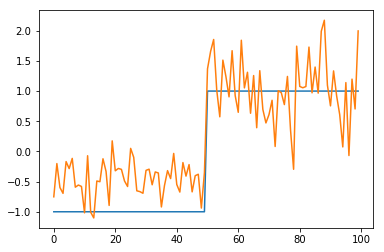

In [5]:
""" 
    Pocket Algorithm 

"""
from copy import deepcopy as copy 


maxiter = 10000
alpha = 0.1


# return 1 if w is better -1 if wp is better
def compare(X, T, w, wp):
    y = np.sign(X @ w)
    yp = np.sign(X @ wp)

    return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    

w = np.zeros(2)
w_pocket = copy(w)

plt.plot(T)
for i in range(maxiter):
    
    converged = True
    for k in np.random.permutation(N): #range(N):
        y = w @ X[k]
        if np.sign(y) != np.sign(T[k]):
            w += alpha * T[k] * X[k]
            converged = False
            ##### additional for pocket algorithm 
            if compare(X, T, w, w_pocket) > 0: 
                w_pocket[:] = w[:]
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
plt.plot(X@w_pocket)

(-3, 7)

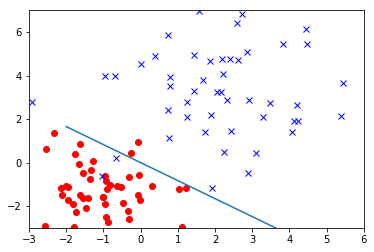

In [6]:
# plot results with decision boundary
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


xt = np.array([-2, 5])
yt = -w_pocket[0] * xt / w_pocket[1]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Can I Use Linear Regression for Classification? 

- Why not? 
- Let's try! 

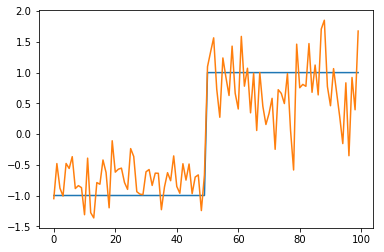

In [13]:
# linear regression for the classifcation

X1 = np.hstack((np.ones((N, 1)), X))
w_ls = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0] # ordinary least squares

Y = X1 @ w_ls

plt.plot(T)
plt.plot(Y)

(-3, 7)

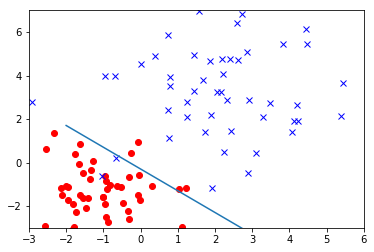

In [17]:
# plot results with decision boundary
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


xt = np.array([-2, 5])
yt = -w_ls[1] * xt / w_ls[1] + w_ls[0]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

# Review

- Classification with Linear Model
  - Perceptron
  - Pocket
  - Linear Regression

- Next
  - Measurements
  - Other approaches
  - generative models 
  

# Classification Metrics

- Accuracy
- Confusion Matrix
- Precision and Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)
- The ROC Curve
- AUC

# Accuracy 


$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}
$$

# Confusion Matrix

- Shows the actual counts for predicted classes vs actual classes


 | - | + 
 --|--|--
 - | 439 | 28
 + | 22 | 511
 
 
  | Red | Blue | Green 
 --|--|--
 Red | 100 | 18 | 12
 Blue | 21 | 50 | 24
 Green | 15 | 23 | 503
 

In [1]:
import numpy as np 
import pandas as pd

def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [2]:
Y = np.array([1,2,1,1,1,2,3,4])
T = np.array([1,3,1,2,1,2,4,4])

confusion_matrix(Y, T)

,1,2,3,4
1,3,1,0,0
2,0,1,1,0
3,0,0,0,1
4,0,0,0,1


# Terminology

 | - | + 
 --|--|--
 - | True Negative (TN) | False Negative (FN)
 + | False Positive (FP) | True Positive (TP)

# Precision, Recall, and Specificity

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

# $F_1$ Score

- A single measure that combines precision and recall
- harmonic mean of precion and recall 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

# Matthews Correlation Coefficient (MCC)

- Use all the counts in the confusion matrix
- A single measure


$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$

# The ROC (Receiver Operating Characteristic) Curve

- True Positive Rate (TPR) against False Positive Rate (FPR)
- Independent to the selection of the thershold
- Shows the TPR and FPR for varying thershold

# ROC Curve

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)
(image from wikipedia)

# ROC Curve

## How does the ROC curve look like?

- A perfect classifer
- A random classifier

# Area Under the Curve (AUC)

- summarizes the ROC curve with a numerical value
- A probability that a positive example will get a higher score than a negative score.

##  Cheat Sheet

http://www.damienfrancois.be/blog/files/modelperfcheatsheet.pdf